<h1 style="background-color:white;font-family:rockwell;font-size:290%;text-align:center">Crop Recommendation System</h1>

![](crop1.jpg)

### Contents
* [**Abstract**](#abstract)
* [**Dataset**](#dataset)
* [**Importing Dataset and the required libraries**](#import)
* [**Description of the dataset**](#description-dataset)
* [**Information about the dataset**](#information-dataset)
* [**HeatMap**](#heatmap)

* [**Part A :: Exploratory Data Analysis**](#eda)
    * [Visualizing the Ratio of Nitrogen and Phosphorous in the soil](#np)
    * [Visualizing the Ratio of Potassium and Temperature in the soil](#np1)
    * [Visualizing the Humidity and pH in the soil](#np2)
    * [Visualizing the Rainfall](#np3)
    * [Introducing Label Encoder](#label-encoder)

* [**Part B :: Prediction Models**](#part-b)
    * [Training and Testing Dataset Spliting using the `train_test_split`](#train-test-split)
    * [K-Nearest Neighbour Algorithm](#knn)
    * [Decision Tree Classifier](#dtc)
    * [Random Forest Classifier](#rfc)
    * [Gausian NB Algorithm](#gnb)
    * [Logistic Regression](#log)
    * [Support Vector Machine](#svm)
    * [Artificial Neural Network](#ann)

* [**Conclusion**](#conclusion)

<a id = 'abstract'></a>
### Abstract
Data mining is the practice of examining and deriving purposeful information from the data. Data mining finds its application in various fields like finance, retail, medicine, agriculture etc. Data mining in agriculture is used for analyzing the various biotic and abiotic factors. Agriculture in India plays a predominant role in economy and employment. The common problem existing among the Indian farmers are they don't choose the right crop based on their soil requirements. Due to this they face a serious setback in productivity. This problem of the farmers has been addressed through precision agriculture. Precision agriculture is a modern farming technique that uses research data of soil characteristics, soil types, crop yield data collection and suggests the farmers the right crop based on their site-specific parameters. This reduces the wrong choice on a crop and increase in productivity. In this paper, this problem is solved by proposing a recommendation system through an ensemble model with majority voting technique using Random tree, CHAID, K-Nearest Neighbor and Naive Bayes as learners to recommend a crop for the site specific parameters with high accuracy and efficiency.

<a id = 'dataset'></a>
### Dataset
The dataset which is used in this project, is collected from Kaggle. Here is the link of the dataset : https://www.kaggle.com/atharvaingle/crop-recommendation-dataset

<a id = 'import'></a>
### Importing the Dataset and the required libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Crop_recommendation.csv')

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.shape

(2200, 8)

<a id="description-dataset"></a>
### Description about the dataset

In [5]:
data.describe

<bound method NDFrame.describe of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

<a id="information-dataset"></a>
### Information about the dataset

The dataset above allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

Data fields:

- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm

In [6]:
data.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data['label'].value_counts()

pomegranate    100
apple          100
mothbeans      100
banana         100
maize          100
coconut        100
rice           100
kidneybeans    100
cotton         100
muskmelon      100
jute           100
watermelon     100
blackgram      100
pigeonpeas     100
mango          100
mungbean       100
lentil         100
grapes         100
coffee         100
chickpea       100
orange         100
papaya         100
Name: label, dtype: int64

<a id = 'heatmap'></a>
### HeatMap Plotting of the features

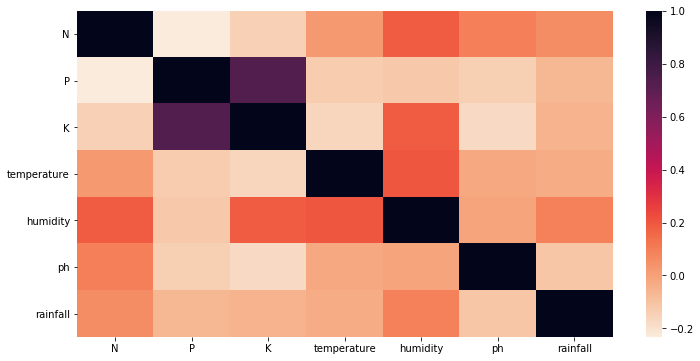

In [9]:
f,ax=plt.subplots(figsize=(12,6))
corr=data.corr()
sns.heatmap(corr , ax=ax ,   cmap="rocket_r")

In [10]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

<a id="eda"></a>
## Part A :: Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

<a id = 'np'></a>
### Visualizing the Ratio of Nitrogen and Phosphorous in the soil
Nitrogen becomes available from decomposing soil organic matter. Phosphorus becomes available from decomposing soil organic matter and minerals.

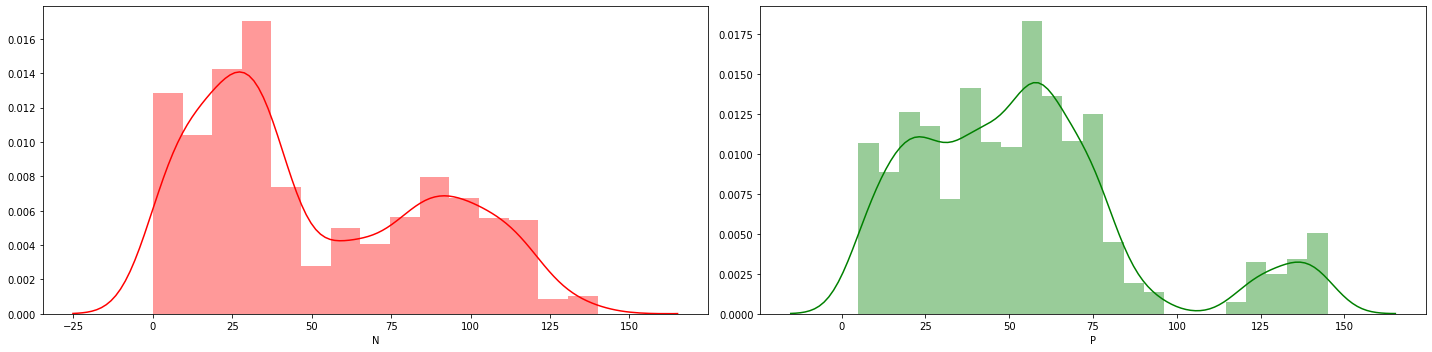

In [11]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['N'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['P'] , color ='green' , ax = ax)
plt.tight_layout()

<a id = 'np1'></a>
### Visualizing the Ratio of Potassium and Temperature in the soil
Potassium is a critical nutrient that plants absorb from the soil, and from fertilizer. It increases disease resistance, helps stalks to grow upright and sturdy, improves drought tolerance and helps plants get through the winter.

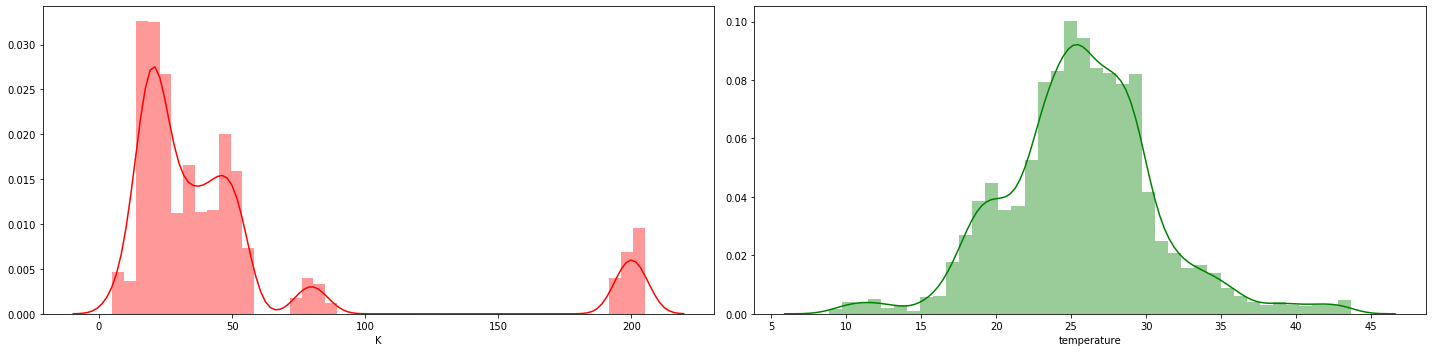

In [12]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['K'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['temperature'] , color ='green' , ax = ax)
plt.tight_layout()

<a id = 'np2'></a>
### Visualizing the Humidity and pH in the soil
 As moisture increased, pH increased, whereas redox potential (Eh) decreased, and consequently, soil Eh and pHss were negatively correlated.

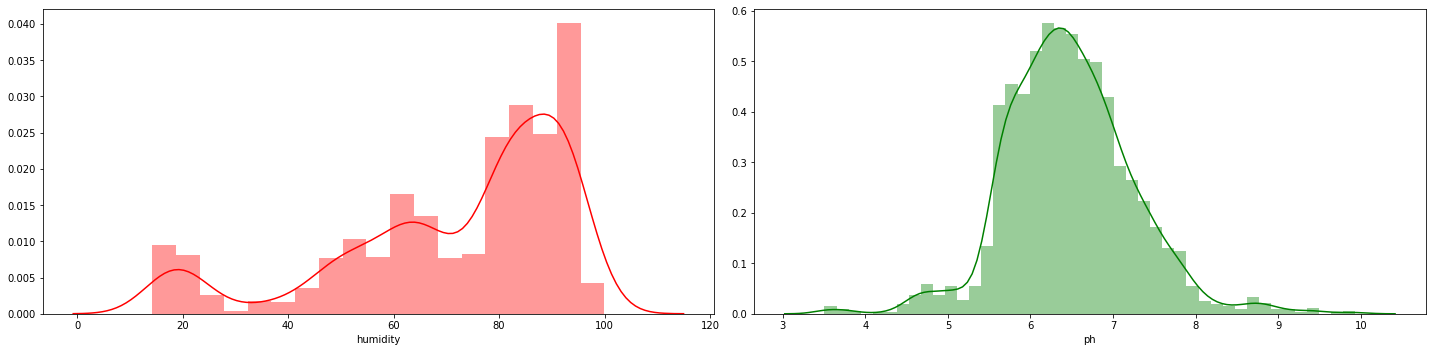

In [13]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['humidity'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['ph'] , color ='green' , ax = ax)
plt.tight_layout()

<a id = 'np3'></a>
### Visualizing the Rainfall
Soil is also greatly affected by rainfall. If it is too wet or too dry, nutrients in the soil can run off and not make it to the plants' roots, leading to poor growth and overall health. Additionally, as mentioned previously, overwatering or too much rain can also lead to bacteria, fungus, and mold growth in the soil.

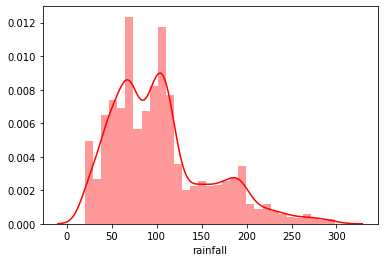

In [14]:
sns.distplot(data['rainfall'],color ='red')

In [15]:
X = data.drop('label' ,axis =1)

<a id = 'label-encoder'></a>
### Introducing Label Encoder
Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
data['label'] = le.fit_transform(data['label'])

In [19]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [20]:
y = data['label']

In [21]:
model = []
accuracy = []

----------------------------------------------------

<a id="part-b"></a>
## Part B :: Classification Algorithms
A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.

Here we are going to prepare several Classification machine learning models based on those we will do a comparative analysis that which model is better among them.

We are using seven different classification algorithms -
* **K-Nearest Neighbours Algorithm** : K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.


* **Support Vector Machine Algorithm** : Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.


* **Random Forest Classifier** : Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.


* **Logistic Regression** : Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).


* **Naive Bayes Classifcation Algorithm** :  Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.


* **Decision Tree Classifier** : Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


* **Artificial Neural Network** : Artificial neural networks, usually simply called neural networks, are computing systems vaguely inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

Let's quickly get into the algorithms!

<a id="train-test-split"></a>
**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 80:20 ratio
  * X_train1 and y_train1 are the trainning datasets
  * X_test1 and y_test1 are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [22]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

<a id = 'log'></a>
### Logistic Regression
 Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [24]:
logReg = LogisticRegression(max_iter = 5000)
logReg.fit(x_train1, y_train1)
logReg.score(x_test1, y_test1)

D:\my project\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.975

<a id = 'dtc'></a>
### Decision Tree Classifier
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [25]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train1, y_train1)
dtc.score(x_test1, y_test1)

0.9863636363636363

<a id = 'rfc'></a>
### Random Forest Classifier
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [26]:
rfc = RandomForestClassifier()
rfc.fit(x_train1, y_train1)
rfc.score(x_test1, y_test1)

0.9931818181818182

<a id = 'knn'></a>
### K-Nearest Neighbour Algorithm
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [27]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
classifier.fit(x_train1, y_train1) 
classifier.score(x_test1, y_test1)

0.9704545454545455

<a id = 'gnb'></a>
### Gausian Naive Bayes Classifier Algorithm
Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.

In [28]:
clf = GaussianNB()
clf.fit(x_train1, y_train1) 
clf.score(x_test1, y_test1)

0.9954545454545455

<a id = "svm"></a>
### SVM Classification
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [29]:
svm = SVC()
svm.fit(x_train1, y_train1)
svm.score(x_test1, y_test1)

0.9613636363636363

<a id = 'ann'></a>
### Artificial Neural Networks Algorithm
Artificial neural networks, usually simply called neural networks, are computing systems vaguely inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

In [38]:
ann = MLPClassifier(alpha=1, max_iter=1000)
ann.fit(x_train1, y_train1)
ann.score(x_test1, y_test1)

0.9522727272727273

------------------------------------------

<a id = 'conclusion'></a>
## Conclusion and Comparison
We have deployed seven machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Logistic Regression|97.5|
|Decision Tree Classifier|98.6|
|Random Forest Classifier|99.3|
|Naive Bayes Algorithm|99.5|
|KNN Algorithm|97.0|
|Support Vector Machine Algorithm|96.1|
|Artificial Neural Network|95.2|

**Comparing all those scores scored by the machine learning algorithms, it is clear that Naive Bayes Algorithm is having the upper hand in case of this dataset and after this, we can use Logistic Regression, Random Forest Classifier, SVM, which are also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Gausian Naive Bayes
2. Random Forest Classifier
3. Decision Tree Classifier
4. Logistic Regression
5. K-Nearest Neighbours
6. Support Vector Machine
7. Artificial Neural Network


Hooray!! The models are deployed successfully!


### Hope this project will help you! Thank you!